# Ridge & Lasso & Regularization

## Objectives 
<a name="objectives"></a>

- List methods other than r-squared to assess model fit

- Describe regularization's role in regression

- Summarize the difference between L1 and L2 norms

- Understand the effect of hyper-parameter $\alpha$ in Ridge and Lasso.

- Compare and contrast between Lasso-Ridge-Linear models.

- Apply Lasso and Ridge with sklearn and understand the parameters.


## Part 0: Review 
## Review Linear Regression once again:
![imune](https://media3.giphy.com/media/l4FGBBs6fjtZXzXCE/giphy.gif?cid=ecf05e47dbb74b8bcd3cf3aafbc86e24452503799b466084&rid=giphy.gif)


__Linear Model__


$$ Y = w_{0} + w_{1}X_1 + w_{2}X_{2} + \cdots + w_{p}X_{p} + \varepsilon $$

 - We train model to understand the paramaters $w_{i}$ 
 
 - Use linear algebra or gradient descent to find parameters to minimize:
 
 Note that the predictions are given by:
 
 $$ \hat{y}_{i} =  w_{0} + w_{1}X_{i1} + w_{2}X_{i2} + \cdots + w_{p}X_{i_p}$$
 
 Therefore individual errors are given by:
 
 $$ e_{i} = y_{i} - \hat{y}_{i} $$
 
 As a result, the residual sum of squares can be expressed as:
 
 $$ RSS(\boldsymbol{w}) = \sum\limits_{i=0}^{N} e_{i}^{2}$$
 
 
 
 $$ J(\boldsymbol{w}) = \sum\limits_{i=0}^{N} (y_{i} - w_{0} - w_{1}X_{i1} - w_{2}X_{i2} - \cdots - w_{p}X_{i_p})^{2} $$
 
 And this equation can be written in short hand as:
 
 $$ J(\boldsymbol{w}) = \rvert \boldsymbol{y} - X \boldsymbol{w} \rvert^{2} $$
 
 or with betas as we are used to seeing them:
 
 $$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(b_jx_{ij} + b))^2$$


## Question: What methods or metrics have you learned to assess model fit?


## Another Question: How do those metrics feel about adding more variables to the model?

![schitts](https://media1.giphy.com/media/fXtGlVSI2ZB2E1JO0b/giphy.gif?cid=ecf05e47f55093929090866ffd59873c647521e25e164830&rid=giphy.gif)

### Review
<a name="review"></a>



[__Overfitting - Underfitting__](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

<img src="underfitting_overfitting.png" alt="Bias-Variance" style="width: 500px;"/>

[__Bias - Variance Trade-Off__](http://scott.fortmann-roe.com/docs/BiasVariance.html)

<img src="bias_variance_trade_off.png" alt="Bias-Variance" style="width: 400px;"/>



## New Tools:
- AIC & BIC to compare models
- Regularization to produce a better model

# Part 1: AIC & BIC
## Calculating AIC and BIC 
AIC and BIC are information criteria for evaluating model performance. These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model.


The BIC is also known as the _Schwarz information criterion (abrv. SIC)_ or the Schwarz-Bayesian information criteria. The AIC is also known as the Akaike information criterion. Both criterion were developed in the 1970s.

- AIC is defined as: $2k - 2log(L)$
- BIC is defined as: $klog(n) - 2log(L)$  

$n$ = sample size <br>
$k$ = variables in model <br>
$L$ = log of sse

In [1]:
import numpy as np

def aic(y, y_pred, k):
    resid = y - y_pred
    sse = (resid**2).sum()
    AIC = 2*k - 2*np.log(sse)
    
    return AIC

In [2]:
def bic(y, y_pred, k, n):
    resid = y - y_pred
    sse = (resid**2).sum()
    BIC = np.log(n) + n*np.log(sse/n)
    
    return BIC

## AIC & BIC in comparsion

Both AIC and BIC are only useful in comparing the performance of two different model specifications and **cannot** be used on their own. 

_**Lower**_ AIC and BIC are better. 

## Part 2: Regularization

## Regularization Techniques


- Why?

    - Reduces complexity
    
    - Reduce the chance of overfitting.
    
    - Reduces model's variance at the expense of introducing small bias
    
    - Increases model's interprettability.
    

## Part 2a: Ridge regularization (L2 Norm)
![ridge](https://media2.giphy.com/media/3Aie9MmJ0klyM/giphy.gif?cid=ecf05e472724cf8b955fe4da2a1050dd8865bec22b629736&rid=giphy.gif)

Instead of minimizing $J(w)$ (least squares method), we will minimize:

$$ J_{\alpha}(\boldsymbol{w}) = J(\boldsymbol{w}) + \alpha\sum_{i=1}^{p} w_{i}^{2} $$

Function is in sklearn as [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

The **goal** of ridge regression is to find  the right alpha that best manages multicolinearity.

The ridge regression applies a penalizing parameter $\lambda$ *slope* $^2$, such that a small bias will be introduced to the entire model depending on the value of $\lambda$, which is called a *hyperparameter*. 

$$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(b_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p b_j^2$$

The result of applying such a penalizing parameter to the cost function, resulting a different regression model that minimizing the residual sum of square **and** the term $\lambda \sum_{j=1}^p b_j^2$. 

The Ridge regression improves the fit of the original regression line by introducing some bias/changing the slope and intercept of the original line. Recall the way we interpret a regression model Y = mx + b: with every unit increase in x, the outcome y increase by m unit. Therefore, the bigger the coefficient m is, the more the outcome is subjected to changes in predictor x. Ridge regression works by reducing the magnitude of the coefficient m and therefore reducing the effect the predictors have on the outcome. Let's look at a simple example.

The ridge regression penalty term contains all of the coefficients squared from the original regression line except for the intercept term. 

## Part 2a: Lasso regularization (L1 Norm)
![lasso](https://media3.giphy.com/media/wRKeX8o1eIxxu/giphy.gif?cid=ecf05e47a70490d9dee94f19dd8876390c0ef88243356922&rid=giphy.gif)

Instead of minimizing $J(\boldsymbol{\omega})$, we will minimize:

$$ J_{\alpha}(\boldsymbol{w}) = J(\boldsymbol{w}) + \alpha\sum_{i=1}^{p}| w_{i} | $$

Function in skelarn as [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

The **goal** of lasso regression is to obtain the subset of predictors and increase model interpretability.

Lasso regression is very similar to Ridge regression except for one difference - the penalty term is not squared but the absolute values of the coefficients muliplied by lambda, expressed by:

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(b_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p \mid b_j \mid$$

The biggest difference in Ridge and Lasso is that Lasso simultaneously performs variable selection: some coefficients are shrunk to 0, rendering them nonexistence in the original regression model. Therefore, Lasso regression performs very well when you have higher dimensional dataset where some predictors are useless; whereas Ridge works best when all the predictors are needed. 

<img src="https://media.giphy.com/media/AWeYSE0qgpk76/giphy.gif" width= "400" />

In [16]:
# implementation 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('mpg')

#data = pd.read_csv("https://raw.githubusercontent.com/learn-co-curriculum/dsc-2-24-09-ridge-and-lasso-regression/master/auto-mpg.csv") 
data = data.sample(50)

data.dropna(axis=0)

y = data[["mpg"]]
X = data.drop(["mpg", "name", "origin"], axis=1)


scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

In [13]:
data.shape
data.dropna(axis=0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
91,13.0,8,400.0,150.0,4464,12.0,73,usa,chevrolet caprice classic
258,20.6,6,231.0,105.0,3380,15.8,78,usa,buick century special
286,17.6,8,302.0,129.0,3725,13.4,79,usa,ford ltd landau
282,22.3,4,140.0,88.0,2890,17.3,79,usa,ford fairmont 4
158,16.0,8,318.0,150.0,4498,14.5,75,usa,plymouth grand fury
319,31.3,4,120.0,75.0,2542,17.5,80,japan,mazda 626
104,12.0,8,400.0,167.0,4906,12.5,73,usa,ford country
129,31.0,4,79.0,67.0,1950,19.0,74,japan,datsun b210
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
337,32.4,4,107.0,72.0,2290,17.0,80,japan,honda accord


In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
91,13.0,8,400.0,150.0,4464,12.0,73,usa,chevrolet caprice classic
258,20.6,6,231.0,105.0,3380,15.8,78,usa,buick century special
286,17.6,8,302.0,129.0,3725,13.4,79,usa,ford ltd landau
282,22.3,4,140.0,88.0,2890,17.3,79,usa,ford fairmont 4
158,16.0,8,318.0,150.0,4498,14.5,75,usa,plymouth grand fury
319,31.3,4,120.0,75.0,2542,17.5,80,japan,mazda 626
104,12.0,8,400.0,167.0,4906,12.5,73,usa,ford country
129,31.0,4,79.0,67.0,1950,19.0,74,japan,datsun b210
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
337,32.4,4,107.0,72.0,2290,17.0,80,japan,honda accord


In [28]:
# Perform t`est train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[[ 12.54160768 -21.24330314   6.51874692 -18.85438341   7.06660671
   11.48100442]]
Unpenalized Linear Regression Intercept:[23.42556306]


In [30]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Lasso Regression Coefficients are:[-7.95994332 -0.         -0.         -5.50703611  0.          3.76995064]
Lasso Linear Regression Intercept:[26.85246778]


In [31]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

Ridge Regression Coefficients are:[[-1.0942435  -7.44168649 -3.33313224 -9.13808516  0.6505599   8.59640407]]
Ridge Linear Regression Intercept:[26.72382774]


In [32]:
# create predictions
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(40,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test),(10,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [33]:
print(y_h_ridge_train.shape)
print(y_h_ridge_test.shape)

(40, 1)
(10, 1)


In [34]:
print(type(y_h_lasso_train))
print(type(y_h_ridge_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Examining the Residual for Ridge, Lasso, and Unpenalized Regression coefficients

In [35]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model mpg    515.616833
dtype: float64
Test Error Ridge Model mpg    54.075409
dtype: float64


Train Error Lasso Model mpg    804.672758
dtype: float64
Test Error Lasso Model mpg    95.800342
dtype: float64


Train Error Unpenalized Linear Model mpg    429.262673
dtype: float64
Test Error Unpenalized Linear Model mpg    114.429672
dtype: float64



## Part 2c: Crossvalidation to Optimize the Regularization Hyperparameter

The regularization strength could sensibly be any nonnegative number, so there's no way to check "all possible" values. It's often useful to try several values that are different orders of magnitude.

In [42]:
from sklearn.model_selection import cross_val_score

alphas = [1, 10, 100, 1000, 10000]
train_scores = []
test_scores = []

for alpha in alphas:
    rr = Ridge(alpha=alpha, random_state=42)
    # upate the names of your datasets
    rr.fit(X_train, y_train)
    train_score = rr.score(X_train, y_train)
    test_score = cross_val_score(rr, X_test, y_test).mean()
    
    train_scores.append(train_score)
    test_scores.append(test_score)

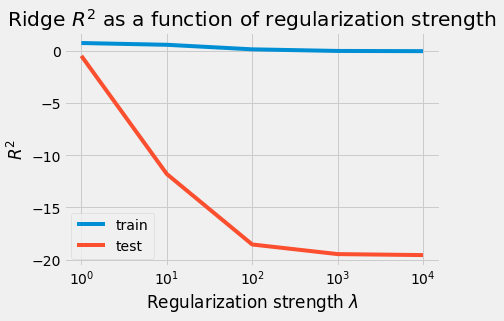

In [43]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
plt.xscale('log')
plt.title('Ridge $R^2$ as a function of regularization strength')
ax.set_xlabel('Regularization strength $\lambda$')
ax.set_ylabel('$R^2$')
ax.plot(alphas, train_scores, label='train')
ax.plot(alphas, test_scores, label='test')
plt.legend();

## Part 3: Practice

__Your Turn__

In [62]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

birds = sns.load_dataset('penguins')

# For simplicity's sake we'll limit our analysis to the numeric columns.

# numeric = birds[['culmen_length_mm', 'culmen_depth_mm',
#                  'flipper_length_mm', 'body_mass_g']]


# We'll drop the rows with null values
cleaned = birds.dropna(axis=0)

X_train, X_test, y_train, y_test = train_test_split(cleaned.drop('body_mass_g',
                                                              axis=1),
                                                   cleaned['body_mass_g'],
                                                   random_state=42)


ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train[['species', 'island', 'sex']])
dummies_df = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names(),
                         index=X_train.index)
X_train_df = pd.concat([X_train[['culmen_length_mm', 'culmen_depth_mm',
                                'flipper_length_mm']], dummies_df], axis=1)
X_train_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,x0_Chinstrap,x0_Gentoo,x1_Dream,x1_Torgersen,x2_MALE
321,55.9,17.0,228.0,0.0,1.0,0.0,0.0,1.0
265,43.6,13.9,217.0,0.0,1.0,0.0,0.0,0.0
36,38.8,20.0,190.0,0.0,0.0,1.0,0.0,1.0
308,47.5,14.0,212.0,0.0,1.0,0.0,0.0,0.0
191,53.5,19.9,205.0,1.0,0.0,1.0,0.0,1.0


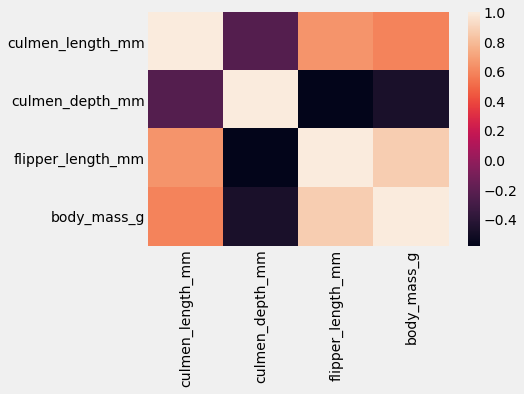

In [63]:
corr = cleaned.corr()

sns.heatmap(corr,

  xticklabels=corr.columns,

  yticklabels=corr.columns)

In [ ]:
aic(y, y_pred, k):
    

- Try at least 3 different model specifications, using polynomials, interaction terms, etc
- Group 1: Use AIC and BIC to pick your "best" model specification using Linear Regression
- Group 2: Use Ridge AND experiement with different values of alpha to find the "best" model. Compare MSE in train and test for each model specification.
- Group 3: Use Lasso AND experiment with different values of alpha to find the "best" model. Compare MSE in train and test for each model specification.
- Report your observations.
- A graph comparing your findings and suggesting a model specification

## Part 4: Summary

#### Effect of $\alpha$ in Lasso and Ridge

<img src="lasso_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<img src="ridge_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<a name='questions'></a>
### Questions



Q. Should I do normalization for Lasso or Ridge?

A. Yes? Why?

Q. When we know that Ridge and Lasso is better than vanilla linear regression?

A. High variation in your model --> Colinearity and too many variables.

Q. How do we know whether we should choose Lasso or Ridge?

A. Most of the time they perform very similar but Lasso has the feature selection property, ridge doesn't have this.

Q: How do we choose $\lambda$?

A. [sklearn gridsearch](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) for small models or random grid search for bigger models.

#### Appendix
<a name='appendix'></a>

Here I would like to add some reading material that I found useful while working with the code.


-  [On ridge and lasso](https://bradleyboehmke.github.io/HOML/regularized-regression.html)

- [pd.get_dummies or OneHotEncoder? - Read second answer](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons)

- [On dummy variable trap](https://www.algosome.com/articles/dummy-variable-trap-regression.html)

- [sklearn.preprocessing.PolynomialFeatures documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

- [A great notebook on Lasso and Ridge](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

- [Another good blog post on Lasso and Ridge](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

- Learn.co -- Section-28 Lasso-Ridge

- [Toward Datascience Article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/) 2.2.2 The Bias-Variance Trade-off and 6.2 Shrinkage Methods




Image Sources in order of appearance: 
- https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

- https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205


